In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [44]:
import matplotlib
#matplotlib.use('nbagg')
from matplotlib import style
#style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
import datetime as dt
import pandas as pd

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [5]:
engine.execute('SELECT * FROM measurements LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70)]

In [6]:
engine.execute('SELECT * FROM stations LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [9]:
# Reflect Database into ORM classes (Station and Measurement)
Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.stations
Measurement = Base.classes.measurements

In [13]:
session = Session(engine)

## Precipitation Analysis

In [24]:
#Design a query to retrieve the last 12 months of precipitation data.

# First, get the most recent date
session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()

('2017-08-23')

In [27]:
# Most recent date in the table is 2017-08-23, so need to get previous 12 months (365 days)
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)  
print(query_date)


2016-08-23


In [47]:
# Query for last 12 months of precipitation data
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > query_date).\
    order_by(Measurement.date).all()

<IPython.core.display.Javascript object>


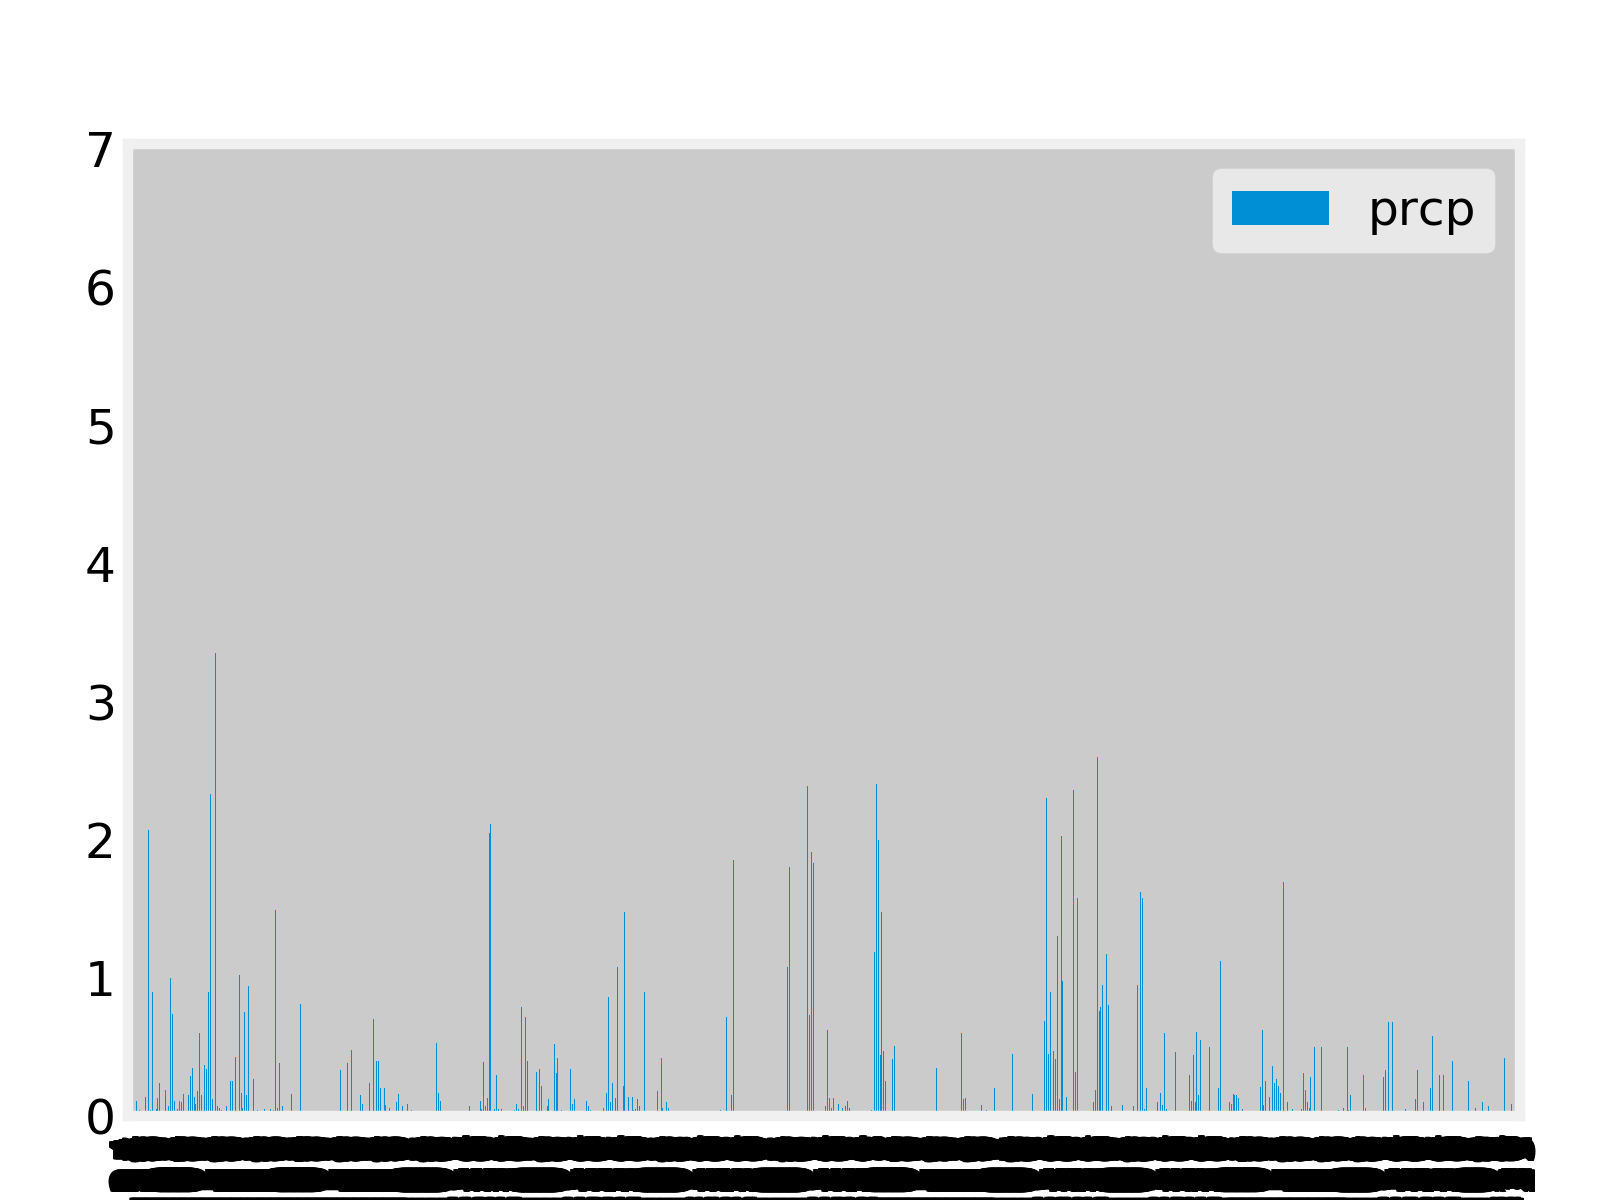

In [60]:
# Plot the Results in a Matplotlib bar chart
### BEGIN SOLUTION
df = pd.DataFrame(prcp_data, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df.plot.bar()
#plt.tight_layout()
plt.show()
### END SOLUTION

In [ ]:
# Use Pandas to print the summary statistics for the precipitation data.

## Station Analysis

In [59]:
#Design a query to calculate the total number of stations
session.query(func.count(Station.station)).all() 
#print("There are " + [num_stations] + " stations.")


[(9)]

In [77]:
# Design a query to find the most active stations.
## List the stations and observation counts in descending order
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [80]:
## Which station has the highest number of observations?
session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()

('USC00519281')

In [84]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
## Filter by the station with the highest number of observations.
session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > query_date).\
    order_by(Measurement.date.desc()).all()


[('2017-08-23', 81),
 ('2017-08-23', 82),
 ('2017-08-23', 82),
 ('2017-08-23', 76),
 ('2017-08-22', 82),
 ('2017-08-22', 82),
 ('2017-08-22', 76),
 ('2017-08-21', 81),
 ('2017-08-21', 79),
 ('2017-08-21', 76),
 ('2017-08-20', 81),
 ('2017-08-20', 80),
 ('2017-08-19', 79),
 ('2017-08-19', 80),
 ('2017-08-19', 71),
 ('2017-08-18', 80),
 ('2017-08-18', 77),
 ('2017-08-18', 79),
 ('2017-08-17', 78),
 ('2017-08-17', 83),
 ('2017-08-17', 76),
 ('2017-08-17', 72),
 ('2017-08-16', 82),
 ('2017-08-16', 79),
 ('2017-08-16', 76),
 ('2017-08-16', 71),
 ('2017-08-15', 78),
 ('2017-08-15', 82),
 ('2017-08-15', 79),
 ('2017-08-15', 77),
 ('2017-08-15', 70),
 ('2017-08-14', 79),
 ('2017-08-14', 81),
 ('2017-08-14', 75),
 ('2017-08-14', 77),
 ('2017-08-14', 79),
 ('2017-08-13', 81),
 ('2017-08-13', 84),
 ('2017-08-13', 77),
 ('2017-08-12', 80),
 ('2017-08-12', 83),
 ('2017-08-12', 74),
 ('2017-08-11', 78),
 ('2017-08-11', 81),
 ('2017-08-11', 81),
 ('2017-08-10', 81),
 ('2017-08-10', 81),
 ('2017-08-10

In [91]:
## Filter by the station with the highest number of observations.
### (identified from the station analysis earlier?)
session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date.desc()).all()

[('USC00519281', '2017-08-18', 79),
 ('USC00519281', '2017-08-17', 76),
 ('USC00519281', '2017-08-16', 76),
 ('USC00519281', '2017-08-15', 77),
 ('USC00519281', '2017-08-14', 77),
 ('USC00519281', '2017-08-13', 77),
 ('USC00519281', '2017-08-06', 83),
 ('USC00519281', '2017-08-05', 82),
 ('USC00519281', '2017-08-04', 77),
 ('USC00519281', '2017-07-31', 76),
 ('USC00519281', '2017-07-30', 81),
 ('USC00519281', '2017-07-29', 82),
 ('USC00519281', '2017-07-28', 81),
 ('USC00519281', '2017-07-27', 76),
 ('USC00519281', '2017-07-26', 75),
 ('USC00519281', '2017-07-25', 77),
 ('USC00519281', '2017-07-24', 75),
 ('USC00519281', '2017-07-23', 82),
 ('USC00519281', '2017-07-22', 77),
 ('USC00519281', '2017-07-21', 77),
 ('USC00519281', '2017-07-20', 77),
 ('USC00519281', '2017-07-19', 76),
 ('USC00519281', '2017-07-18', 76),
 ('USC00519281', '2017-07-17', 76),
 ('USC00519281', '2017-07-16', 80),
 ('USC00519281', '2017-07-15', 80),
 ('USC00519281', '2017-07-14', 76),
 ('USC00519281', '2017-07-13

In [88]:
# find the station with the highest number of observations
#session.query(Measurement.station, func.count(Measurement.tobs)).\
#    group_by(Measurement.station).\
#    order_by(func.count(Measurement.tobs).desc()).first

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [ ]:
## Plot the results as a histogram with bins=12.